In [80]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class net(nn.Module):

    def __init__(self):
        super(net, self).__init__()
        # define network
        self.fc1 = nn.Linear(64, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 100)
        self.fc4 = nn.Linear(100, 100)
        self.fc5 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        output = self.fc5(x)
        return output

In [81]:
from torch import optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
digits = load_digits()     # loading data

X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

X_train = torch.tensor(X_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
Y_train = torch.tensor(Y_train, dtype = torch.int64)
Y_test = torch.tensor(Y_test, dtype = torch.int64)

# 訓練用データでDataLoaderを作成. tensor型に変換し、データセット化する
dataset = TensorDataset(X_train, Y_train)
loader = DataLoader(dataset, batch_size = 32, shuffle = True)

In [82]:
train_losses = []
test_losses = []
def trainer(model, dataloader, X_test, Y_test):
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    #device = "cpu"
    print("use", device)

    model.to(device)
    # ネットワークをある程度固定できれば、高速化する
    torch.backends.cudnn.benchmark = True
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())
    #train_losses = []
    #test_losses = []
    X_test = X_test.to(device)
    Y_test = Y_test.to(device)

    
    for epoch in range(100):
        print("epoch {}/{}".format(epoch + 1, 100))
        print("===================================")

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0
            for i, (xx, yy) in enumerate(dataloader):
                xx = xx.to(device)
                yy = yy.to(device)
                optimizer.zero_grad()
                if phase == "train":
                    y_pred = model(xx)
                    loss = loss_fn(y_pred, yy)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()
            if phase == "train":
                #print(i)
                train_losses.append(running_loss/(i))
                
            if phase == "val":

                # validation
                y_pred = model(X_test)
                test_loss = loss_fn(y_pred, Y_test)
                test_losses.append(test_loss.item())
            



In [83]:
model = net()
print(model)

net(
  (fc1): Linear(in_features=64, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=10, bias=True)
)


In [84]:
trainer(model, loader, X_test = X_test, Y_test = Y_test)

use cuda:0
epoch 1/100
epoch 2/100
epoch 3/100
epoch 4/100
epoch 5/100
epoch 6/100
epoch 7/100
epoch 8/100
epoch 9/100
epoch 10/100
epoch 11/100
epoch 12/100
epoch 13/100
epoch 14/100
epoch 15/100
epoch 16/100
epoch 17/100
epoch 18/100
epoch 19/100
epoch 20/100
epoch 21/100
epoch 22/100
epoch 23/100
epoch 24/100
epoch 25/100
epoch 26/100
epoch 27/100
epoch 28/100
epoch 29/100
epoch 30/100
epoch 31/100
epoch 32/100
epoch 33/100
epoch 34/100
epoch 35/100
epoch 36/100
epoch 37/100
epoch 38/100
epoch 39/100
epoch 40/100
epoch 41/100
epoch 42/100
epoch 43/100
epoch 44/100
epoch 45/100
epoch 46/100
epoch 47/100
epoch 48/100
epoch 49/100
epoch 50/100
epoch 51/100
epoch 52/100
epoch 53/100
epoch 54/100
epoch 55/100
epoch 56/100
epoch 57/100
epoch 58/100
epoch 59/100
epoch 60/100
epoch 61/100
epoch 62/100
epoch 63/100
epoch 64/100
epoch 65/100
epoch 66/100
epoch 67/100
epoch 68/100
epoch 69/100
epoch 70/100
epoch 71/100
epoch 72/100
epoch 73/100
epoch 74/100
epoch 75/100
epoch 76/100
epoch 77/1

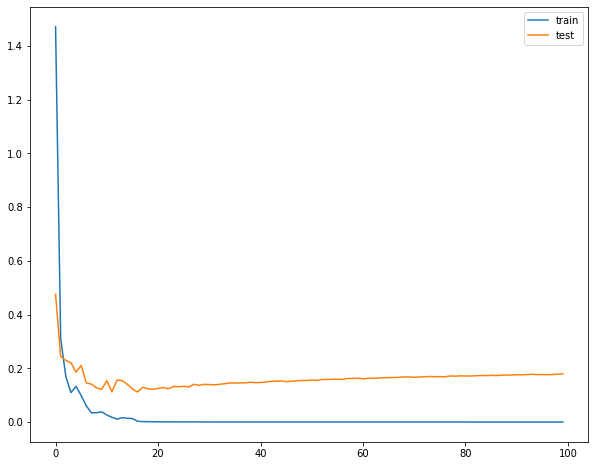

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 8))
plt.plot(train_losses, label = "train")
plt.plot(test_losses, label = "test")
plt.legend()
plt.show()